In [1]:
import os, glob
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
print('done')

done


In [2]:
df_train = pd.read_csv(r"D:\ML\house prices\data\train.csv")
print( len( df_train ) )
df_train.head(5)

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# get column types
col_counts = dict(df_train.count(axis=0))
col_types = {c: d for c, d in dict(df_train.dtypes).items() if col_counts[c] > 1000 and c != 'SalePrice'}
_is_num = lambda x: x in (int, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']
CATEGORICAL: ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 

# data distributions 

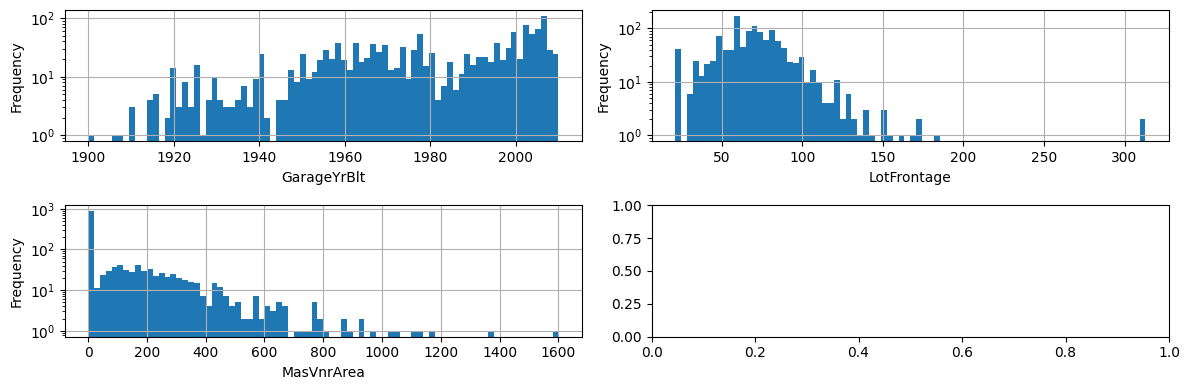

In [5]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 2 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] # represents one subplot in the grid.
    #  i // 2 and i % 2 expressions are used to calculate the row and column index of the subplot for the current column.
    df_train[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True)
fig.tight_layout() # to ensure that all of the subplots are properly spaced.

nb_pies=19 | nb_rows=52


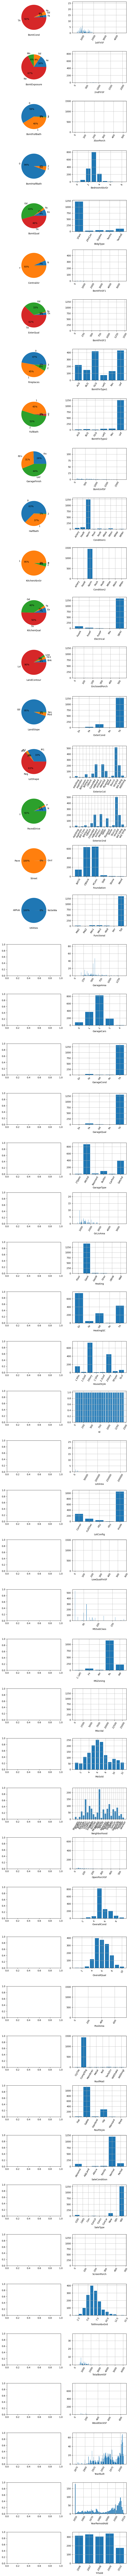

In [7]:
nb_pies = sum([len(df_train[c].dropna().unique()) < 5 for c in cols_string]) # is the maximum of the number of columns with less than 5 unique values 
nb_rows = max([nb_pies, len(cols_string) - nb_pies])
print(f"{nb_pies=} | {nb_rows=}")

fig, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(8, 3 * nb_rows))
i_0, i_1 = 0, 0
for col in cols_string:
    vals = df_train[col].values
    vals = vals[~pd.isnull(vals)] # filtered to remove any missing values.
    unique_values, counts = np.unique(vals, return_counts=True) # contain the unique values and counts of the column, respectively.
    
    if len(unique_values) < 5:
        axarr[i_0, 0].pie(counts, labels=unique_values, autopct='%.0f%%')
        axarr[i_0, 0].set_xlabel(col)
        i_0 += 1
        
    else:
        axarr[i_1, 1].bar(unique_values, counts)
        axarr[i_1, 1].set_xlabel(col)
        axarr[i_1, 1].grid()
        axarr[i_1, 1].tick_params(axis='x', labelrotation=60)
        #plt.xticks(rotation=45, ha='center')
        i_1 += 1
fig.tight_layout()

# Browse test data 

In [8]:
df_test = pd.read_csv(r"D:\ML\house prices\data\test.csv")
print(f"data size: {len(df_test)}")
display(df_test.head())

data size: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
TRAIN_FEATURES = cols_numerical + cols_string
TEST_TARGET = "SalePrice"

 
TRAIN_FEATURES

['GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 '1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',


# Data split and & pre-prcessing

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

class MultiColumnEncoderScaler:
    encoder_cls = LabelEncoder #  use for categorical features.
    scaler_cls = StandardScaler # The scaler class to use for numerical features. By default, the StandardScaler class is used.
    
    def __init__(self, skip_columns = ("Id", "SalePrice")):
        self.skip_columns = skip_columns
        self.bank = {} # dictionary of encoder and scaler objects.

    def fit(self, X, y=None):
        col_types = {c: d for c, d in dict(X.dtypes).items()} # dictionary of column names and data types.
        for col, dtp in col_types.items():
            if col in self.skip_columns:
                continue
            if _is_num(dtp): # If the column is a numerical data type, the StandardScaler class is used to create an Scaler object.
                self.bank[col] = self.scaler_cls().fit(X[[col]].values)
            else:
                self.bank[col] = self.encoder_cls().fit(X[col].values)
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in X.columns:
            if col in self.skip_columns:
                continue
            bank_ = self.bank[col]
            if isinstance(bank_, self.encoder_cls): # If the encoder object is an instance of the LabelEncoder class, 
                X_[col] = X_[col].fillna(bank_.classes_[0])
                X_[col] = bank_.transform(X_[col].values) # The column data is encoded using the encoder object.
            else:
                X_[col] = X_[col].fillna(X_[col].median())
                X_[col] = bank_.transform(X_[[col]].values)[:, 0]
        return X_

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [22]:
preproc = MultiColumnEncoderScaler()
df = preproc.fit_transform(df_train)
display(df.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,-0.208034,327,1,0,3,3,0,4,0,5,2,2,0,5,6,4,104,53,1,1,12,13,1,0.510015,2,4,2,2,3,3,2,361,5,0,73,179,1,0,1,4,134,232,0,531,1,0,2,1,3,1,2,6,6,0,0,1,0.992426,1,2,220,4,4,2,0,49,0,0,0,0,0,0,0,0,1,2,8,4,208500
1,2,0,3,0.409895,498,1,0,3,3,0,2,0,24,1,2,0,2,5,7,77,26,1,1,8,8,0,-0.572835,3,4,1,2,3,1,0,482,5,0,167,441,1,0,1,4,427,0,0,259,0,1,2,0,3,1,3,4,6,1,4,1,-0.101543,1,2,149,4,4,2,187,0,0,0,0,0,0,0,0,0,4,1,8,4,181500
2,3,5,3,-0.084449,702,1,0,0,3,0,4,0,5,2,2,0,5,6,4,102,52,1,1,12,13,1,0.322174,2,4,2,2,3,2,2,222,5,0,278,214,1,0,1,4,178,239,0,570,1,0,2,1,3,1,2,4,6,1,4,1,0.911391,1,2,260,4,4,2,0,30,0,0,0,0,0,0,0,0,8,2,8,4,223500
3,4,6,3,-0.414011,489,1,0,0,3,0,0,0,6,2,2,0,5,6,4,19,20,1,1,13,15,0,-0.572835,3,4,0,3,1,3,0,66,5,0,346,117,1,2,1,4,208,180,0,536,1,0,1,0,3,1,2,5,6,1,2,5,0.789839,2,3,284,4,4,2,0,24,108,0,0,0,0,0,0,0,1,0,8,0,140000
4,5,5,3,0.574676,925,1,0,0,3,0,2,0,15,2,2,0,5,7,4,101,50,1,1,12,13,1,1.360826,2,4,2,2,3,0,2,328,5,0,318,370,1,0,1,4,347,320,0,734,1,0,2,1,4,1,2,7,6,1,4,1,0.870874,1,3,380,4,4,2,118,70,0,0,0,0,0,0,0,0,11,2,8,4,250000


In [23]:
from sklearn.model_selection import train_test_split

print(f"data shape: {df.shape} | targets: {df_train[TEST_TARGET].values.shape}")
X_train, X_valid, y_train, y_valid = train_test_split(
    df[TRAIN_FEATURES].values, df[TEST_TARGET].values, test_size=0.2, random_state=42)

data shape: (1460, 81) | targets: (1460,)


In [24]:
import xgboost as xgb

In [25]:
model = xgb.XGBRegressor(
    device="cuda", #? device: This parameter specifies whether to use CPU or GPU for computation. In this case, it is set to "cuda", which means that the GPU will be used.
    
    #tree_method="approx",
    objective='reg:absoluteerror',#? This parameter specifies the loss function to be minimized. In this case, it is set to 'reg:absoluteerror', which means that the model will minimize the mean absolute error.
    eval_metric='mae', #? mean absolute error will be used as the evaluation metric.
    enable_categorical=True,
    learning_rate=0.02,
# max_depth is an optional parameter that shows the maximum depth of each decision tree.
    max_depth=20,
# learning_rate is an optional parameter where the step size shrinkage prevents overfitting.
# subsample is an optional parameter representing the fraction of samples used for each tree.
    subsample=1,
# colsample_bytree is an optional parameter representing the fraction of features used for each tree.
    colsample_bytree=1,
# n_estimators is a required parameter that determines the number of boosting iterations and controls the overall complexity of the model.
    n_estimators=450,
    random_state=42,
)

#Training the model on the training data
model.fit(X_train, y_train)

c:\Users\Youssif Allam\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cuda', early_stopping_rounds=None, enable_categorical=True,
             eval_metric='mae', feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=450, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [26]:
from sklearn import metrics

# Making predictions on the test set
predictions = model.predict(X_valid)

# Calculate the mean absolute and squared error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_valid, predictions))
print("Mean Relative Error:", metrics.mean_absolute_percentage_error(y_valid, predictions))

Mean Absolute Error: 16467.626123715752
Mean Relative Error: 0.0989218690383186
